In [ ]:
!pip install fredapi

In [ ]:
# Setting up the environment for data analysis with pandas, numpy, matplotlib, plotly, and accessing the FRED API key

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import os

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_palet = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

from google.colab import userdata
api_key = os.environ["fred_api_key"] = userdata.get('fred_api_key')
fred_key = api_key

# 1. Creating Fred Object

In [ ]:
fred = Fred(api_key=fred_key)

# 2. Searching Economic Data

In [ ]:
sp_search = fred.search('S&P', order_by='popularity')

In [ ]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-10-17,2024-10-17,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-10-15,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-10-16 09:16:08-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-10-17,2024-10-17,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-07-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-09-25 10:50:02-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-10-17,2024-10-17,S&P 500,2014-10-17,2024-10-16,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-10-16 19:12:03-05:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-10-17,2024-10-17,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-10-15,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-10-16 09:16:11-05:00,82,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2024-10-17,2024-10-17,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2024-10-15,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-10-16 09:23:02-05:00,78,The ICE BofA Option-Adjusted Spreads (OASs) ar...


In [ ]:
sp_search.shape

(1000, 15)

# Pulling Raw Data

<Axes: title={'center': 'S&P 500'}>

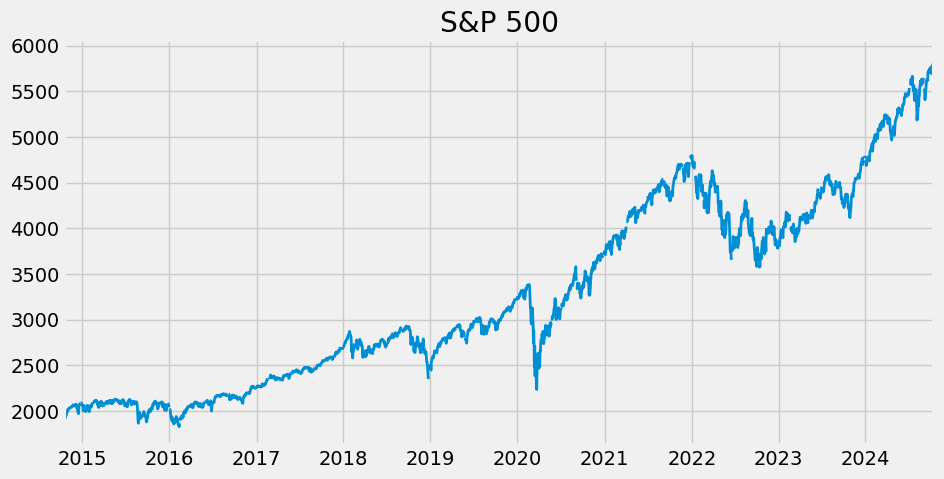

In [ ]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10,5), title='S&P 500', lw=2)

# Pull and Join Multiple Data Series

In [ ]:
# Search for monthly state unemployment rate data, filtering to include only seasonally adjusted rates in percentage, and titles containing 'Unemployment Rate'

unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [ ]:
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-10-17,2024-10-17,Unemployment Rate,1948-01-01,2024-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-10-04 07:54:02-05:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-10-17,2024-10-17,Unemployment Rate - Black or African American,1972-01-01,2024-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-10-04 07:54:03-05:00,72,The series comes from the 'Current Population ...
CAUR,CAUR,2024-10-17,2024-10-17,Unemployment Rate in California,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-23 09:48:02-05:00,64,None
TXUR,TXUR,2024-10-17,2024-10-17,Unemployment Rate in Texas,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-23 09:48:03-05:00,56,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2024-10-17,2024-10-17,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,54,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000026,LNS14000026,2024-10-17,2024-10-17,"Unemployment Rate - 20 Yrs. & over, Women",1948-01-01,2024-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-10-04 07:54:43-05:00,6,To obtain estimates of women worker employment...
LNS14000048,LNS14000048,2024-10-17,2024-10-17,Unemployment Rate - 25 Yrs. & over,1948-01-01,2024-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-10-04 07:54:43-05:00,6,The series comes from the 'Current Population ...
LNS14000089,LNS14000089,2024-10-17,2024-10-17,Unemployment Rate - 25-34 Yrs.,1948-01-01,2024-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-10-04 07:54:50-05:00,6,The series comes from the 'Current Population ...


In [ ]:
# Removing unwanted series IDs from the unemployment DataFrame by specifying a list of IDs to exclude and dropping them from the dataset

ids_to_remove = ['LNS14000006','M0892AUSM156SNBR','LNS14000024',
                 'LNS14000031','M0892BUSM156SNBR','LNS14000002',
                 'LNS14000009','LNS14000003','LNS14000001','LNS14027660',
                 'LNS14027662','LNS14024887','LRUN64TTUSM156S','LNS14032183',
                 'LNS14000012','LNS14027659','LASMT261982000000003',
                 'LNS14000060','LNS14000028','LASMT391746000000003',
                 'LNS14000018','LNS14000036','LNS14000032','LNS14200000',
                 'LRUN24TTUSM156S','LNS14027689','LNS14100000','LNS14000315',
                 'LNS14000029','LRHUTTTTUSM156S','LNS14024230','LNS14000025',
                 'LNS14000061','LNS14000026','LNS14000048','LNS14000089',
                 'M08311USM156SNBR','M08311USM156SNBR','LRUNTTTTUSM156S','LNS14000150',
                 'UNRATE','U2RATE','CMWRUR','CSOUUR','CNERUR','CWSTUR','CNEWUR','DCUR','PRUR']

unemp_df = unemp_df.drop(ids_to_remove)

In [ ]:
# Fetching unemployment rate series data for each ID from the FRED API, converting the results into DataFrames, and concatenating them into a single DataFrame for all states

all_results = []

for myid in unemp_df.index:
  results = fred.get_series(myid)
  results = results.to_frame(name=myid)
  all_results.append(results)
unemp_states = pd.concat(all_results, axis=1)

In [ ]:
unemp_states

,CAUR,TXUR,NYUR,FLUR,PAUR,OHUR,MIUR,ALUR,MAUR,NCUR,ILUR,NJUR,GAUR,COUR,AZUR,WIUR,VAUR,KYUR,SCUR,NMUR,MNUR,TNUR,WAUR,MDUR,ORUR,WVUR,NVUR,ARUR,OKUR,MOUR,AKUR,IAUR,UTUR,INUR,LAUR,HIUR,NDUR,MTUR,MSUR,MEUR,NEUR,CTUR,IDUR,NHUR,RIUR,KSUR,WYUR,DEUR,VTUR,SDUR
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.8,10.2,5.8,6.1,5.6,7.4,8.6,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.8,6.6,6.3,9.8,3.4,5.8,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.2,5.8,6.1,5.6,7.4,8.7,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.9,6.6,6.3,9.8,3.4,5.8,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.1,5.7,6.1,5.6,7.3,8.7,5.9,6.0,8.4,6.4,9.4,7.5,9.2,7.3,5.8,5.9,7.0,4.3,5.8,6.5,6.3,9.8,3.4,5.8,6.6,8.6,3.3,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.3,6.6,10.3,8.3,5.6,10.0,5.6,6.0,5.6,7.2,8.6,5.8,6.0,8.5,6.4,9.2,7.5,9.0,7.2,5.8,6.0,6.9,4.2,5.8,6.3,6.4,9.7,3.5,5.8,6.4,8.6,3.2,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.1,6.6,10.3,8.1,5.6,9.8,5.5,5.9,5.5,7.0,8.6,5.7,5.9,8.5,6.5,9.1,7.4,8.9,7.1,5.7,6.0,6.9,4.1,5.7,6.0,6.5,9.4,3.6,5.8,6.3,8.5,3.1,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,5.3,4.0,4.2,3.3,3.4,4.0,3.9,3.1,2.9,3.5,4.8,4.7,3.1,3.7,3.6,2.9,2.8,4.6,3.2,3.8,2.7,3.1,4.8,2.6,4.2,4.3,5.1,3.4,3.5,3.4,4.6,2.8,2.8,3.6,4.3,3.1,2.0,3.1,2.8,3.1,2.5,4.4,3.3,2.6,4.1,2.8,2.8,3.9,2.1,2.0
2024-05-01,5.2,4.0,4.2,3.3,3.4,4.2,3.9,3.0,3.0,3.6,4.9,4.6,3.2,3.8,3.4,2.9,2.7,4.6,3.4,3.8,2.8,3.0,4.9,2.7,4.2,4.2,5.1,3.4,3.5,3.5,4.5,2.8,2.9,3.7,4.1,3.0,2.0,3.1,2.8,3.0,2.5,4.3,3.3,2.5,4.3,2.9,2.9,3.9,2.1,2.0
2024-06-01,5.2,4.0,4.2,3.3,3.4,4.4,4.1,2.9,3.2,3.6,5.0,4.6,3.3,3.8,3.3,2.9,2.7,4.6,3.6,3.9,2.9,3.0,4.8,2.8,4.1,4.1,5.2,3.3,3.4,3.7,4.5,2.8,3.0,3.8,4.0,2.9,2.1,3.1,2.8,2.8,2.6,3.9,3.4,2.5,4.3,3.0,2.9,4.0,2.1,2.0
2024-07-01,5.2,4.1,4.3,3.3,3.4,4.5,4.4,2.8,3.5,3.7,5.2,4.7,3.4,3.9,3.4,3.0,2.7,4.7,3.9,4.0,3.2,3.0,4.9,2.8,4.1,4.2,5.4,3.3,3.5,3.8,4.5,2.8,3.2,4.0,3.9,2.9,2.2,3.1,2.7,2.8,2.6,3.6,3.5,2.5,4.5,3.2,2.9,4.1,2.1,2.0


In [ ]:
# Cleaning the unemployment data by removing rows with missing values, mapping the series IDs to state names, and renaming the columns accordingly

unemp_states = unemp_states.dropna()

id_to_state = unemp_df['title'].str.replace('Unemployment Rate in','').to_dict()

unemp_states.columns = [id_to_state [c] for c in unemp_states.columns]

In [ ]:
unemp_states.shape

(584, 50)

In [ ]:
unemp_states

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,North Carolina,Illinois,New Jersey,Georgia,Colorado,Arizona,Wisconsin,Virginia,Kentucky,South Carolina,New Mexico,Minnesota,Tennessee,Washington,Maryland,Oregon,West Virginia,Nevada,Arkansas,Oklahoma,Missouri,Alaska,Iowa,Utah,Indiana,Louisiana,Hawaii,North Dakota,Montana,Mississippi,Maine,Nebraska,Connecticut,Idaho,New Hampshire,Rhode Island,Kansas,Wyoming,Delaware,Vermont,South Dakota
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.8,10.2,5.8,6.1,5.6,7.4,8.6,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.8,6.6,6.3,9.8,3.4,5.8,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.2,5.8,6.1,5.6,7.4,8.7,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.9,6.6,6.3,9.8,3.4,5.8,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.1,5.7,6.1,5.6,7.3,8.7,5.9,6.0,8.4,6.4,9.4,7.5,9.2,7.3,5.8,5.9,7.0,4.3,5.8,6.5,6.3,9.8,3.4,5.8,6.6,8.6,3.3,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.3,6.6,10.3,8.3,5.6,10.0,5.6,6.0,5.6,7.2,8.6,5.8,6.0,8.5,6.4,9.2,7.5,9.0,7.2,5.8,6.0,6.9,4.2,5.8,6.3,6.4,9.7,3.5,5.8,6.4,8.6,3.2,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.1,6.6,10.3,8.1,5.6,9.8,5.5,5.9,5.5,7.0,8.6,5.7,5.9,8.5,6.5,9.1,7.4,8.9,7.1,5.7,6.0,6.9,4.1,5.7,6.0,6.5,9.4,3.6,5.8,6.3,8.5,3.1,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,5.3,4.0,4.2,3.3,3.4,4.0,3.9,3.1,2.9,3.5,4.8,4.7,3.1,3.7,3.6,2.9,2.8,4.6,3.2,3.8,2.7,3.1,4.8,2.6,4.2,4.3,5.1,3.4,3.5,3.4,4.6,2.8,2.8,3.6,4.3,3.1,2.0,3.1,2.8,3.1,2.5,4.4,3.3,2.6,4.1,2.8,2.8,3.9,2.1,2.0
2024-05-01,5.2,4.0,4.2,3.3,3.4,4.2,3.9,3.0,3.0,3.6,4.9,4.6,3.2,3.8,3.4,2.9,2.7,4.6,3.4,3.8,2.8,3.0,4.9,2.7,4.2,4.2,5.1,3.4,3.5,3.5,4.5,2.8,2.9,3.7,4.1,3.0,2.0,3.1,2.8,3.0,2.5,4.3,3.3,2.5,4.3,2.9,2.9,3.9,2.1,2.0
2024-06-01,5.2,4.0,4.2,3.3,3.4,4.4,4.1,2.9,3.2,3.6,5.0,4.6,3.3,3.8,3.3,2.9,2.7,4.6,3.6,3.9,2.9,3.0,4.8,2.8,4.1,4.1,5.2,3.3,3.4,3.7,4.5,2.8,3.0,3.8,4.0,2.9,2.1,3.1,2.8,2.8,2.6,3.9,3.4,2.5,4.3,3.0,2.9,4.0,2.1,2.0
2024-07-01,5.2,4.1,4.3,3.3,3.4,4.5,4.4,2.8,3.5,3.7,5.2,4.7,3.4,3.9,3.4,3.0,2.7,4.7,3.9,4.0,3.2,3.0,4.9,2.8,4.1,4.2,5.4,3.3,3.5,3.8,4.5,2.8,3.2,4.0,3.9,2.9,2.2,3.1,2.7,2.8,2.6,3.6,3.5,2.5,4.5,3.2,2.9,4.1,2.1,2.0


In [ ]:
# Creating an interactive line plot of unemployment rates by state using Plotly

px.line(unemp_states, title='Unemployment Rates by State')

# Pulling April 2020 Unemployment Rate per State

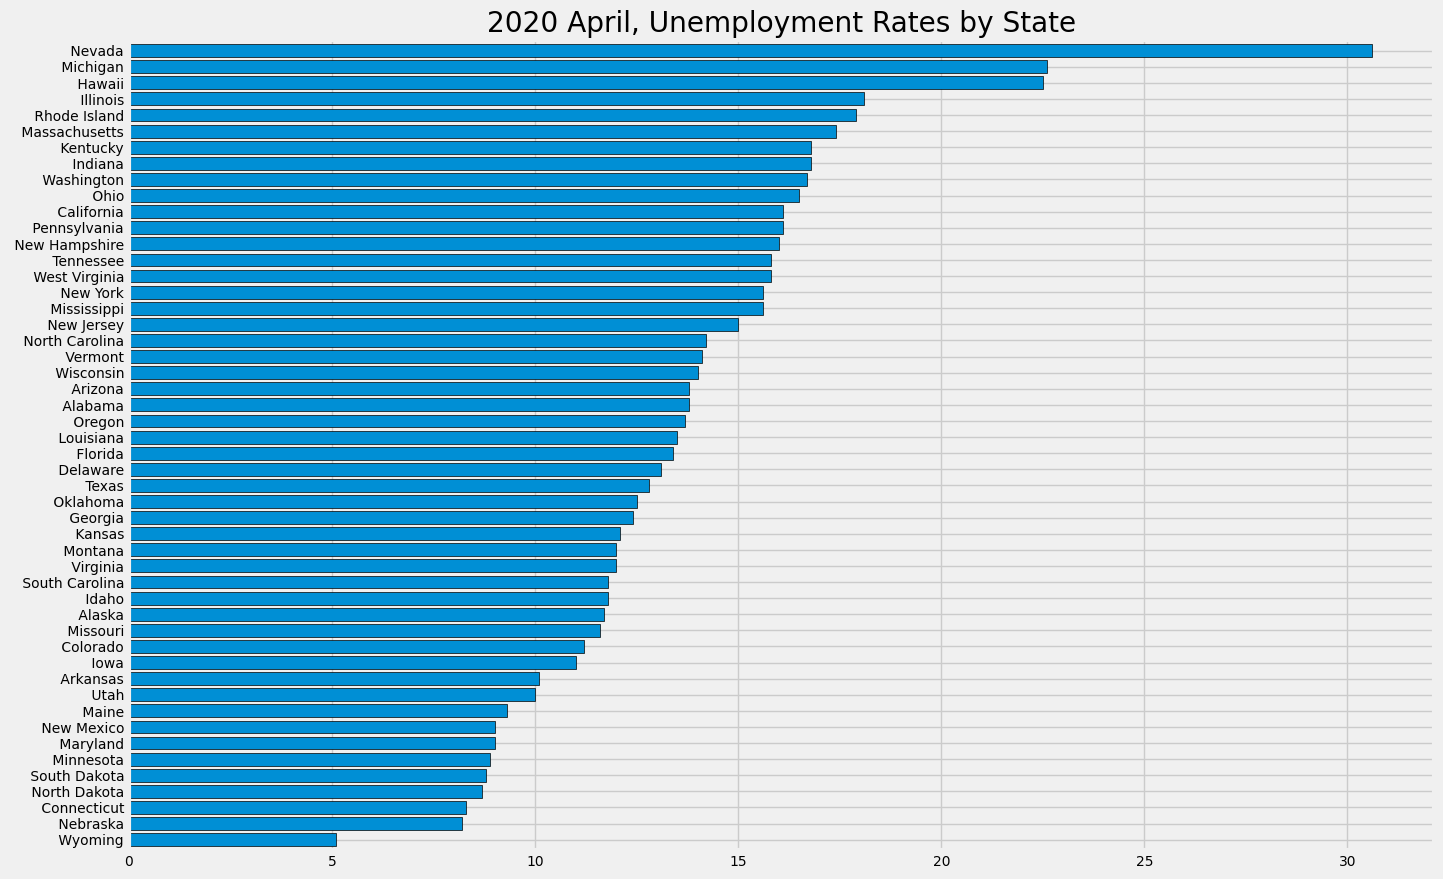

In [ ]:
# Plotting a horizontal bar chart to visualize the unemployment rates by state for April 2020, sorted in ascending order

ax = unemp_states.loc[unemp_states.index == '2020-04-01'].T \
      .sort_values('2020-04-01') \
      .plot(kind='barh', figsize=(15,10), width=0.8, edgecolor='black',
            title='2020 April, Unemployment Rates by State',fontsize=10)

ax.legend().remove()
plt.show()

# Pulling Participation Rate

In [ ]:
# Searching for monthly participation rate data by state from FRED, then filtering for seasonally adjusted data expressed in percentages

part_df = fred.search('participation rate state', filter=('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [ ]:
part_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CIVPART,CIVPART,2024-10-17,2024-10-17,Labor Force Participation Rate,1948-01-01,2024-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-10-04 07:54:02-05:00,84,The series comes from the 'Current Population ...
LNS11300060,LNS11300060,2024-10-17,2024-10-17,Labor Force Participation Rate - 25-54 Yrs.,1948-01-01,2024-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-10-04 07:54:06-05:00,70,The series comes from the 'Current Population ...
LNS11300002,LNS11300002,2024-10-17,2024-10-17,Labor Force Participation Rate - Women,1948-01-01,2024-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-10-04 07:54:09-05:00,66,To obtain estimates of women worker employment...
LNS11300001,LNS11300001,2024-10-17,2024-10-17,Labor Force Participation Rate - Men,1948-01-01,2024-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-10-04 07:54:10-05:00,61,The series comes from the 'Current Population ...
LNS11324230,LNS11324230,2024-10-17,2024-10-17,Labor Force Participation Rate - 55 Yrs. & over,1948-01-01,2024-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-10-04 07:54:14-05:00,54,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRIN74MAUSM156S,LRIN74MAUSM156S,2024-10-17,2024-10-17,Infra-Annual Labor Statistics: Inactivity Rate...,1981-01-01,2024-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-10-15 14:01:44-05:00,1,OECD Data Filters: REF_AREA: USA MEASURE: OLF...
LRIN64MAUSM156S,LRIN64MAUSM156S,2024-10-17,2024-10-17,Infra-Annual Labor Statistics: Inactivity Rate...,1977-01-01,2024-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-10-15 14:01:49-05:00,1,OECD Data Filters: REF_AREA: USA MEASURE: OLF...
LRIN64FEUSM156S,LRIN64FEUSM156S,2024-10-17,2024-10-17,Infra-Annual Labor Statistics: Inactivity Rate...,1977-01-01,2024-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-10-15 14:01:50-05:00,1,OECD Data Filters: REF_AREA: USA MEASURE: OLF...


In [ ]:
# Removing specified irrelevant or duplicate series IDs from the participation rate DataFrame.

ids_to_remove = ['LNS11300060','LNS11300002','LNS11300001',
                                               'LNS11324230','LNS11324230','LRIN74MAUSM156S',
                                               'LRIN64MAUSM156S','LRIN64FEUSM156S','LRIN55FEUSM156S',
                                               'LRIN25FEUSM156S','CIVPART','LNS11300012','LNS11300006',
                                               'LRAC25MAUSM156S','LNS11300036','LRAC25FEUSM156S',
                                               'LNS11327662','LNS11300028','LNS11300031','LNS11300003',
                                               'LNS11327660','LNS11300029','LNS11300009','LNS11300032',
                                               'LNS11327659','LNS11300026','LRIN64TTUSM156S',
                                               'LRAC64TTUSM156S','LNS11300025','LNS11327689',
                                               'LRAC55TTUSM156S','LNS11300015','LNS11300018',
                                               'LRAC24TTUSM156S','LRAC74TTUSM156S',
                                               'LRIN25MAUSM156S','LRACTTFEUSM156S','LRAC25TTUSM156S',
                                               'LRACTTTTUSM156S','LRACTTMAUSM156S','LRAC74TTUSM156S',
                                               'LRIN25MAUSM156S','LRACTTFEUSM156S','LRAC25TTUSM156S',
                                               'LRACTTTTUSM156S','LRACTTMAUSM156S','LRAC55MAUSM156S',
                                               'LRAC64FEUSM156S','LRAC55FEUSM156S','LRAC24MAUSM156S',
                                               'LRAC74FEUSM156S','LRAC24FEUSM156S','LRAC64MAUSM156S',
                                               'LRAC74MAUSM156S','LRINTTTTUSM156S','LRINTTMAUSM156S',
                                               'LRINTTFEUSM156S','LRIN55TTUSM156S','LRIN74TTUSM156S',
                                               'LRIN24TTUSM156S','LRIN25TTUSM156S','LRIN55MAUSM156S',
                                               'LRIN24MAUSM156S','LRIN24FEUSM156S','LRIN74FEUSM156S']

part_df = part_df.drop(ids_to_remove)

In [ ]:
part_df.shape

(51, 15)

In [ ]:
# Creating a dictionary to map series IDs to state names by removing the text "Labour Force Participation Rate for" from the titles

part_id_to_state = part_df['title'].str.replace('Labour Fource Participation Rate for','').to_dict()

In [ ]:
# Fetching data series for each state from FRED, converting it into a DataFrame,
# and concatenating all results into a single DataFrame for state-wise labor force participation rates.

all_results = []

for myid in part_df.index:
  results = fred.get_series(myid)
  results = results.to_frame(name=myid)
  all_results.append(results)
part_states = pd.concat(all_results, axis=1)

In [ ]:
# Rename columns using part_id_to_state mapping

part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [ ]:
# Simplify column names by stripping "Labor Force Participation Rate for"

part_states = part_states.rename(columns=lambda x: x.split("Labor Force Participation Rate for")[-1].strip())

In [ ]:
part_states

,California,Alabama,New York,Michigan,Mississippi,Texas,Florida,Kentucky,Ohio,Wisconsin,Pennsylvania,Massachusetts,Minnesota,Maryland,West Virginia,Tennessee,Maine,Illinois,North Carolina,Georgia,Louisiana,South Carolina,Colorado,Utah,Virginia,Indiana,Missouri,New Jersey,Iowa,Alaska,Washington,Arizona,New Mexico,Idaho,Arkansas,Oklahoma,Nebraska,Hawaii,Nevada,Montana,Oregon,New Hampshire,Vermont,Connecticut,North Dakota,South Dakota,Kansas,Rhode Island,District Of Columbia,Delaware,Wyoming
1976-01-01,62.6,57.0,58.0,61.6,58.8,63.8,55.8,60.5,61.7,65.6,58.4,64.8,65.6,64.3,52.5,59.6,62.1,63.0,66.5,63.7,56.8,65.3,67.2,62.8,65.9,64.0,60.5,61.5,64.4,69.0,60.9,59.5,60.8,63.0,57.9,59.3,64.9,69.9,71.3,62.7,62.9,65.9,63.6,64.2,62.6,64.6,65.1,63.8,64.4,62.7,65.3
1976-02-01,62.4,56.9,58.0,61.5,58.6,63.5,55.7,60.3,61.7,65.5,58.3,64.7,65.5,64.2,52.4,59.4,61.9,63.0,66.3,63.6,56.6,65.2,67.0,62.6,65.8,63.9,60.3,61.4,64.3,68.4,60.7,59.2,60.5,62.8,57.8,59.2,64.9,69.6,70.8,62.5,62.7,65.6,63.4,64.1,62.4,64.4,65.0,63.7,64.5,62.5,64.9
1976-03-01,62.2,56.8,58.0,61.5,58.5,63.4,55.5,60.2,61.7,65.4,58.3,64.6,65.4,64.1,52.3,59.3,61.9,62.9,66.2,63.5,56.5,65.0,66.8,62.5,65.6,63.8,60.3,61.4,64.2,67.8,60.6,59.1,60.3,62.7,57.7,59.1,64.8,69.6,70.5,62.4,62.5,65.6,63.2,64.0,62.3,64.4,64.9,63.6,64.5,62.5,64.7
1976-04-01,62.2,56.8,58.0,61.6,58.5,63.5,55.5,60.1,61.6,65.4,58.3,64.6,65.4,64.1,52.3,59.3,61.8,62.9,66.2,63.5,56.4,64.9,66.6,62.5,65.5,63.8,60.4,61.5,64.1,67.9,60.6,59.1,60.3,62.7,57.7,59.0,64.8,69.4,70.4,62.3,62.4,65.7,63.5,64.1,62.5,64.3,65.0,63.7,64.5,62.4,64.9
1976-05-01,62.3,56.8,58.1,61.7,58.5,63.6,55.4,60.1,61.6,65.5,58.3,64.6,65.5,64.1,52.2,59.4,61.7,63.0,66.3,63.6,56.4,64.7,66.5,62.6,65.4,63.9,60.6,61.6,64.1,67.9,60.7,59.1,60.3,62.8,57.7,59.0,64.8,69.3,70.5,62.2,62.5,66.0,63.6,64.3,62.6,64.3,65.1,63.6,64.4,62.4,65.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,62.0,57.5,61.3,62.3,53.7,64.2,59.3,57.1,61.8,65.6,62.9,65.1,68.0,65.2,55.2,59.6,59.4,64.7,60.6,61.5,58.8,57.2,68.0,68.9,66.4,62.5,63.3,64.6,66.8,65.0,63.8,62.2,57.2,62.7,57.5,63.2,68.6,59.7,62.7,62.8,62.9,65.5,65.5,64.6,69.0,67.6,66.1,64.7,72.8,60.1,63.0
2024-05-01,62.0,57.5,61.3,62.3,53.8,64.2,59.1,57.3,61.9,65.6,62.9,65.3,68.0,65.3,55.1,59.6,59.5,64.9,60.5,61.6,58.6,57.2,67.9,68.7,66.3,62.4,63.4,64.5,66.7,64.9,63.7,62.2,57.2,62.7,57.6,63.2,68.5,59.6,62.7,62.8,63.0,65.6,65.6,64.7,68.9,67.5,66.1,64.9,72.7,59.9,62.9
2024-06-01,62.0,57.5,61.3,62.3,54.0,64.3,58.9,57.4,62.1,65.5,62.9,65.7,67.8,65.4,55.1,59.5,59.6,64.9,60.5,61.7,58.6,57.3,67.9,68.6,66.2,62.4,63.6,64.6,66.5,64.8,63.7,62.2,57.3,62.8,57.7,63.1,68.4,59.6,62.7,62.8,63.0,65.6,65.7,64.6,68.9,67.5,66.1,65.1,72.6,59.8,63.0
2024-07-01,62.0,57.5,61.3,62.4,54.2,64.4,58.8,57.6,62.3,65.5,62.9,66.1,67.7,65.5,55.1,59.5,59.8,65.0,60.4,61.8,58.6,57.5,67.9,68.6,66.1,62.5,63.8,64.7,66.4,64.8,63.6,62.3,57.4,62.9,57.9,63.1,68.4,59.7,62.7,62.9,63.0,65.6,65.7,64.4,68.9,67.5,66.1,65.2,72.5,59.8,63.1


In [ ]:
part_states = part_states.drop(columns=['District Of Columbia'])

In [ ]:
part_states.shape
part_states

,California,Alabama,New York,Michigan,Mississippi,Texas,Florida,Kentucky,Ohio,Wisconsin,Pennsylvania,Massachusetts,Minnesota,Maryland,West Virginia,Tennessee,Maine,Illinois,North Carolina,Georgia,Louisiana,South Carolina,Colorado,Utah,Virginia,Indiana,Missouri,New Jersey,Iowa,Alaska,Washington,Arizona,New Mexico,Idaho,Arkansas,Oklahoma,Nebraska,Hawaii,Nevada,Montana,Oregon,New Hampshire,Vermont,Connecticut,North Dakota,South Dakota,Kansas,Rhode Island,Delaware,Wyoming
1976-01-01,62.6,57.0,58.0,61.6,58.8,63.8,55.8,60.5,61.7,65.6,58.4,64.8,65.6,64.3,52.5,59.6,62.1,63.0,66.5,63.7,56.8,65.3,67.2,62.8,65.9,64.0,60.5,61.5,64.4,69.0,60.9,59.5,60.8,63.0,57.9,59.3,64.9,69.9,71.3,62.7,62.9,65.9,63.6,64.2,62.6,64.6,65.1,63.8,62.7,65.3
1976-02-01,62.4,56.9,58.0,61.5,58.6,63.5,55.7,60.3,61.7,65.5,58.3,64.7,65.5,64.2,52.4,59.4,61.9,63.0,66.3,63.6,56.6,65.2,67.0,62.6,65.8,63.9,60.3,61.4,64.3,68.4,60.7,59.2,60.5,62.8,57.8,59.2,64.9,69.6,70.8,62.5,62.7,65.6,63.4,64.1,62.4,64.4,65.0,63.7,62.5,64.9
1976-03-01,62.2,56.8,58.0,61.5,58.5,63.4,55.5,60.2,61.7,65.4,58.3,64.6,65.4,64.1,52.3,59.3,61.9,62.9,66.2,63.5,56.5,65.0,66.8,62.5,65.6,63.8,60.3,61.4,64.2,67.8,60.6,59.1,60.3,62.7,57.7,59.1,64.8,69.6,70.5,62.4,62.5,65.6,63.2,64.0,62.3,64.4,64.9,63.6,62.5,64.7
1976-04-01,62.2,56.8,58.0,61.6,58.5,63.5,55.5,60.1,61.6,65.4,58.3,64.6,65.4,64.1,52.3,59.3,61.8,62.9,66.2,63.5,56.4,64.9,66.6,62.5,65.5,63.8,60.4,61.5,64.1,67.9,60.6,59.1,60.3,62.7,57.7,59.0,64.8,69.4,70.4,62.3,62.4,65.7,63.5,64.1,62.5,64.3,65.0,63.7,62.4,64.9
1976-05-01,62.3,56.8,58.1,61.7,58.5,63.6,55.4,60.1,61.6,65.5,58.3,64.6,65.5,64.1,52.2,59.4,61.7,63.0,66.3,63.6,56.4,64.7,66.5,62.6,65.4,63.9,60.6,61.6,64.1,67.9,60.7,59.1,60.3,62.8,57.7,59.0,64.8,69.3,70.5,62.2,62.5,66.0,63.6,64.3,62.6,64.3,65.1,63.6,62.4,65.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,62.0,57.5,61.3,62.3,53.7,64.2,59.3,57.1,61.8,65.6,62.9,65.1,68.0,65.2,55.2,59.6,59.4,64.7,60.6,61.5,58.8,57.2,68.0,68.9,66.4,62.5,63.3,64.6,66.8,65.0,63.8,62.2,57.2,62.7,57.5,63.2,68.6,59.7,62.7,62.8,62.9,65.5,65.5,64.6,69.0,67.6,66.1,64.7,60.1,63.0
2024-05-01,62.0,57.5,61.3,62.3,53.8,64.2,59.1,57.3,61.9,65.6,62.9,65.3,68.0,65.3,55.1,59.6,59.5,64.9,60.5,61.6,58.6,57.2,67.9,68.7,66.3,62.4,63.4,64.5,66.7,64.9,63.7,62.2,57.2,62.7,57.6,63.2,68.5,59.6,62.7,62.8,63.0,65.6,65.6,64.7,68.9,67.5,66.1,64.9,59.9,62.9
2024-06-01,62.0,57.5,61.3,62.3,54.0,64.3,58.9,57.4,62.1,65.5,62.9,65.7,67.8,65.4,55.1,59.5,59.6,64.9,60.5,61.7,58.6,57.3,67.9,68.6,66.2,62.4,63.6,64.6,66.5,64.8,63.7,62.2,57.3,62.8,57.7,63.1,68.4,59.6,62.7,62.8,63.0,65.6,65.7,64.6,68.9,67.5,66.1,65.1,59.8,63.0
2024-07-01,62.0,57.5,61.3,62.4,54.2,64.4,58.8,57.6,62.3,65.5,62.9,66.1,67.7,65.5,55.1,59.5,59.8,65.0,60.4,61.8,58.6,57.5,67.9,68.6,66.1,62.5,63.8,64.7,66.4,64.8,63.6,62.3,57.4,62.9,57.9,63.1,68.4,59.7,62.7,62.9,63.0,65.6,65.7,64.4,68.9,67.5,66.1,65.2,59.8,63.1


# Plot Unemployment Vs. Participation

In [ ]:
# Sorting States in Alphabetical order for unemployement dataframe

unemp_states = unemp_states.sort_index(axis=1)

In [ ]:
unemp_states.columns

Index([' Alabama', ' Alaska', ' Arizona', ' Arkansas', ' California',
       ' Colorado', ' Connecticut', ' Delaware', ' Florida', ' Georgia',
       ' Hawaii', ' Idaho', ' Illinois', ' Indiana', ' Iowa', ' Kansas',
       ' Kentucky', ' Louisiana', ' Maine', ' Maryland', ' Massachusetts',
       ' Michigan', ' Minnesota', ' Mississippi', ' Missouri', ' Montana',
       ' Nebraska', ' Nevada', ' New Hampshire', ' New Jersey', ' New Mexico',
       ' New York', ' North Carolina', ' North Dakota', ' Ohio', ' Oklahoma',
       ' Oregon', ' Pennsylvania', ' Rhode Island', ' South Carolina',
       ' South Dakota', ' Tennessee', ' Texas', ' Utah', ' Vermont',
       ' Virginia', ' Washington', ' West Virginia', ' Wisconsin', ' Wyoming'],
      dtype='object')

In [ ]:
# Removing the space before state names

unemp_states.columns = [col.lstrip() for col in unemp_states.columns]

In [ ]:
unemp_states.columns

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [ ]:
# Sorting States in Alphabetical order for participation dataframe

part_states = part_states.sort_index(axis=1)

In [ ]:
part_states.columns

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [ ]:
unemp_states.shape

(584, 50)

In [ ]:
part_states.shape

(584, 50)

In [ ]:
# Verifying that both the dataframes are have same column names

part_cols = part_states.columns
unemp_cols = unemp_states.columns

diff = set(part_cols) - set(unemp_cols)
print(diff)

set()


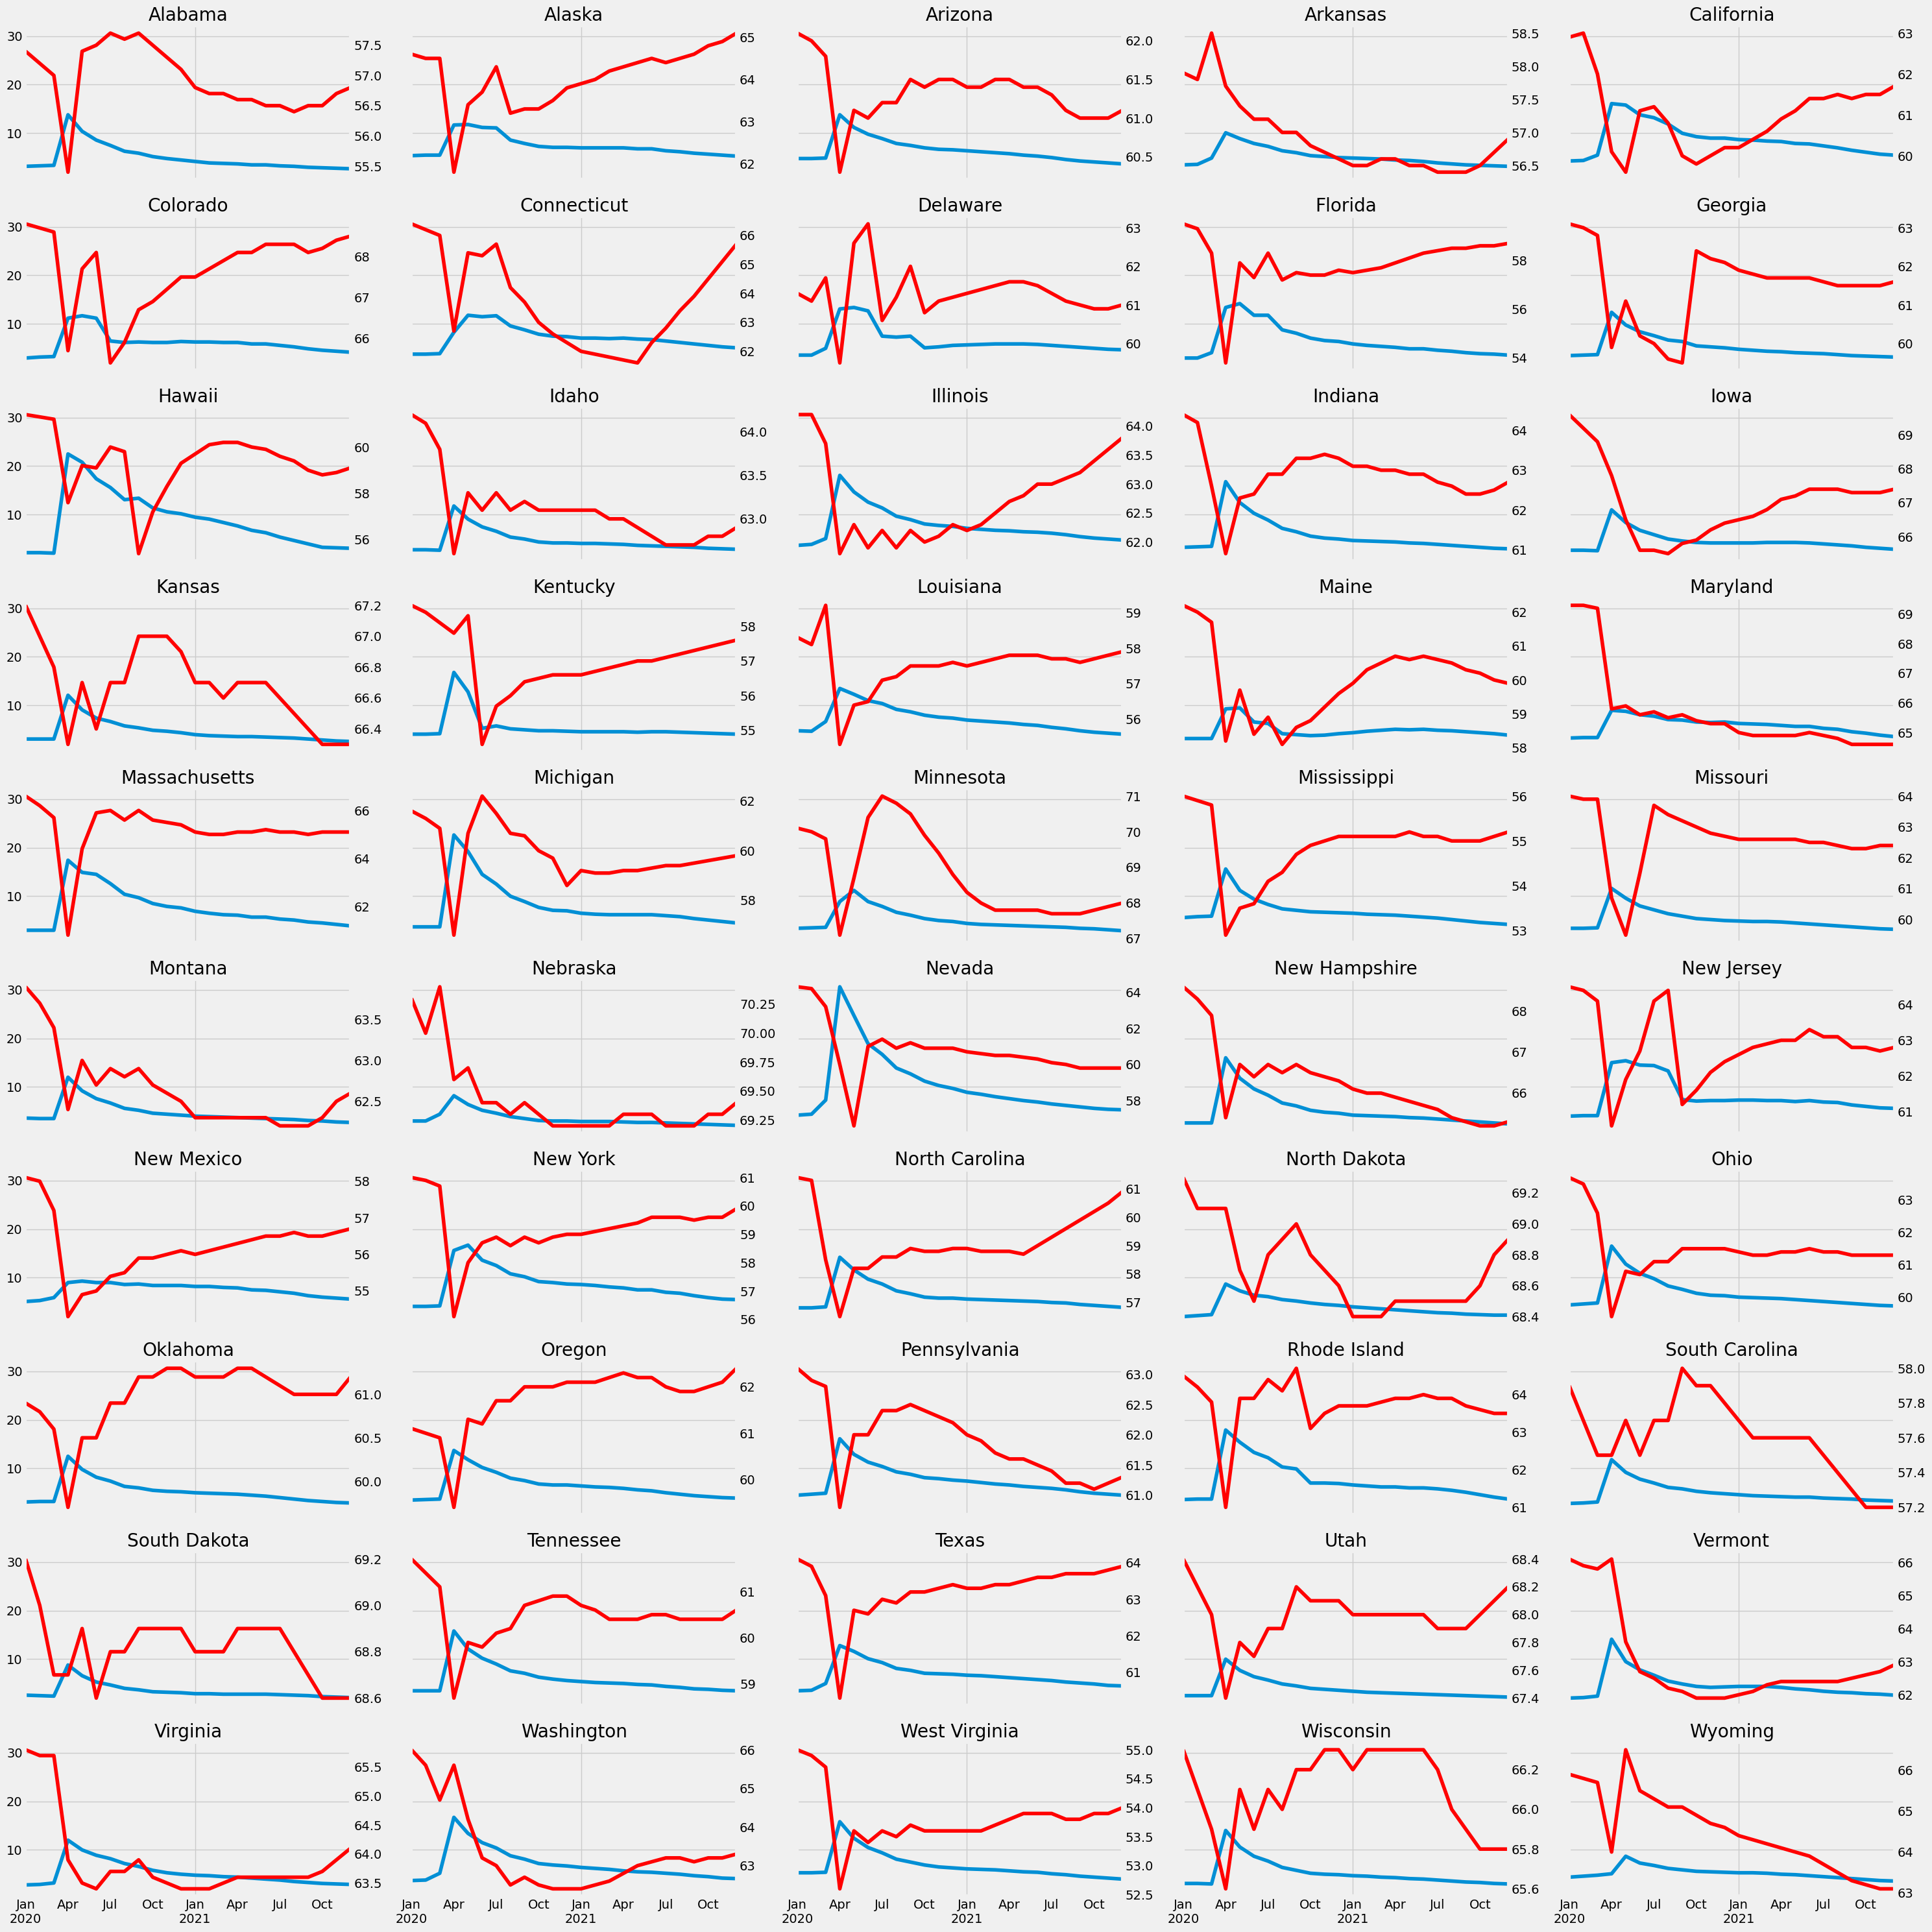

In [ ]:
# Plotting the graph of Unemployment Vs. Participation on both the dataframes for all the 50 states for the years 2020 and 2021

fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True, sharey=True)
axs = axs.flatten()

i = 0
for state in unemp_states.columns:
    ax2 = axs[i].twinx()
    unemp_states.query('index >= 2020 and index < 2022')[state].plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state].plot(ax=ax2, label='Participation', color='red')
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()